In [1]:
import os
import cv2
import joblib
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [28]:
directory = './digits'
listDigits =[]

for filename in os.listdir(directory):
    pathToImage = os.path.join(directory, filename)
    im = cv2.imread(pathToImage, 0)
    listDigits.append(im)

In [29]:
print(len(listDigits))
print(listDigits[0].shape)

81
(43, 43)


In [30]:
def showImages(images, titleList=None):
    fig = plt.figure(figsize=(15,15))
    rows = 9
    cols = 9
    for idx, im in enumerate(images):
        
        plt.subplot(rows, cols, idx+1)
        plt.imshow(im, cmap='gray')
        if titleList is not None:
            plt.title(str(titleList[idx]))
        plt.axis("off")
    plt.show()

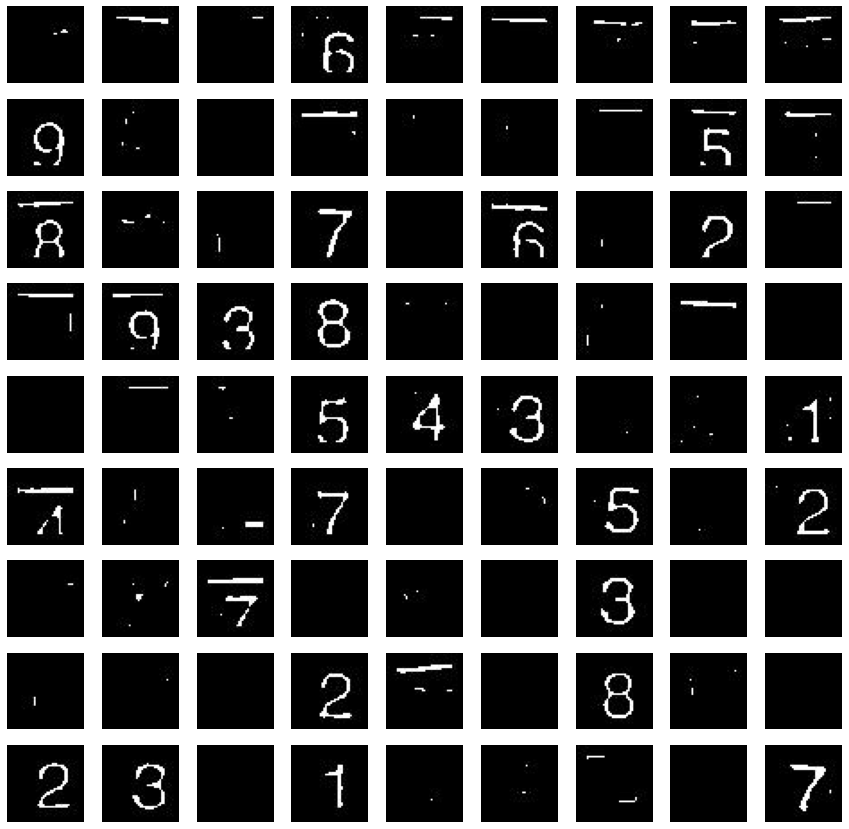

In [31]:
showImages(listDigits)

In [32]:
#loading svm
model = joblib.load('fitModel.pkl')
print(type(model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [33]:
def digitPresent(idx, im, debug):
    #find contours and check the biggest contour
    cnts, _ = cv2.findContours(im.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    if len(cnts)==0:
        return None
    
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(im.shape, dtype='uint8')
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    h, w = im.shape
    percentFilled = cv2.countNonZero(mask)/ float(w*h)
    
    if percentFilled < 0.07:
        return None
    
    digit = cv2.bitwise_and(im, im, mask=mask)
    
    if debug:
        cv2.imshow(str(idx), digit)
        cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #resizing into 8x8 for using the svm
    return cv2.resize(digit, (28,28))

In [34]:
digitsExtracted = []
d=None
count=0
for idx, im in enumerate(listDigits):
    d = digitPresent(idx, im, False) 
    if d is None:
        digitsExtracted.append(0)
    else :
        count+=1
        d = d.reshape(1,-1)
        #print(d)
        digitsExtracted.append(model.predict(d)[0])

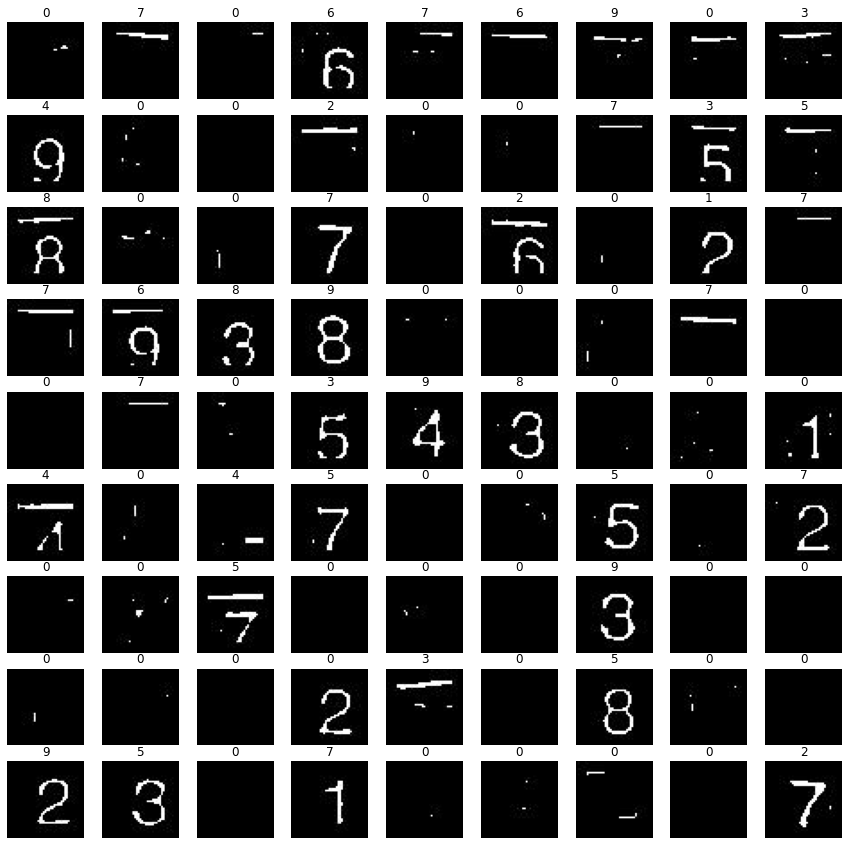

In [35]:
showImages(listDigits, digitsExtracted)

In [27]:
for im in listDigits:
    i = cv2.resize(im, (28,28))
    cv2.imshow('i',i)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
i = 